## **Project 2- April 2025**
**Demand-Forecasting-Global-Food-Prices**
=====================================
## **Regression** 
----------

### **Importing libraries**

In [100]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error, r2_score

# Data scaling
scaler = StandardScaler()

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')


### **Loading the dataset**

In [ ]:
df = pd.read_csv('food_prices_database.csv')


## **Data Preprocessing** 

##### **Shape of the dataset**

In [102]:
df.shape

(1560551, 18)

#### **Head of the dataset**

In [103]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


#### **Tail of the dataset**

In [104]:
df.tail()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
1560546,271.0,Zimbabwe,3444,Midlands,2185,Vhugwi,497,"Sugar (white, fortified) - Retail",0.0,USD,15,Retail,5,KG,9,2017,1.50,NaN
1560547,271.0,Zimbabwe,3444,Midlands,2187,Murowa,50,Beans - Retail,0.0,USD,15,Retail,5,KG,3,2018,2.80,NaN
1560548,271.0,Zimbabwe,3444,Midlands,2187,Murowa,51,Maize - Retail,0.0,USD,15,Retail,5,KG,3,2018,0.40,NaN
1560549,271.0,Zimbabwe,3444,Midlands,2187,Murowa,96,Oil (vegetable) - Retail,0.0,USD,15,Retail,15,L,3,2018,2.35,NaN
1560550,271.0,Zimbabwe,3444,Midlands,2187,Murowa,264,"Maize meal (white, roller) - Retail",0.0,USD,15,Retail,5,KG,3,2018,0.55,NaN


#### **Info of the dataset**

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560551 entries, 0 to 1560550
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   adm0_id             1560551 non-null  float64
 1   adm0_name           1560551 non-null  object 
 2   adm1_id             1560551 non-null  int64  
 3   adm1_name           1089223 non-null  object 
 4   mkt_id              1560551 non-null  int64  
 5   mkt_name            1560551 non-null  object 
 6   cm_id               1560551 non-null  int64  
 7   cm_name             1560551 non-null  object 
 8   cur_id              1560551 non-null  float64
 9   cur_name            1560551 non-null  object 
 10  pt_id               1560551 non-null  int64  
 11  pt_name             1560551 non-null  object 
 12  um_id               1560551 non-null  int64  
 13  um_name             1560551 non-null  object 
 14  mp_month            1560551 non-null  int64  
 15  mp_year        

#### **Dtypes of the dataset**

In [106]:
df.dtypes

adm0_id               float64
adm0_name              object
adm1_id                 int64
adm1_name              object
mkt_id                  int64
mkt_name               object
cm_id                   int64
cm_name                object
cur_id                float64
cur_name               object
pt_id                   int64
pt_name                object
um_id                   int64
um_name                object
mp_month                int64
mp_year                 int64
mp_price              float64
mp_commoditysource    float64
dtype: object

##### **statistical analysis of the dataset**

In [107]:
df.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price,mp_commoditysource
count,1.560551e+06,1.560551e+06,1.560551e+06,1.560551e+06,1560551.0,1.560551e+06,1.560551e+06,1.560551e+06,1.560551e+06,1.560551e+06,0.0
mean,9.844180e+02,2.754153e+04,1.264696e+03,1.881567e+02,0.0,1.491051e+01,1.442846e+01,6.354202e+00,2.014892e+03,6.136956e+03,NaN
std,6.950778e+03,1.236072e+05,8.436958e+02,1.502811e+02,0.0,2.958780e-01,2.368151e+01,3.391472e+00,4.382253e+00,1.217337e+05,NaN
min,1.000000e+00,0.000000e+00,8.000000e+01,5.000000e+01,0.0,1.400000e+01,5.000000e+00,1.000000e+00,1.990000e+03,0.000000e+00,NaN
25%,1.080000e+02,1.572000e+03,5.340000e+02,7.100000e+01,0.0,1.500000e+01,5.000000e+00,3.000000e+00,2.013000e+03,3.540000e+01,NaN
50%,1.550000e+02,2.205000e+03,1.075000e+03,1.200000e+02,0.0,1.500000e+01,5.000000e+00,6.000000e+00,2.016000e+03,2.062500e+02,NaN
75%,2.050000e+02,3.433000e+03,1.895000e+03,2.770000e+02,0.0,1.500000e+01,9.000000e+00,9.000000e+00,2.018000e+03,8.250000e+02,NaN
max,7.000100e+04,9.000220e+05,4.083000e+03,8.380000e+02,0.0,1.800000e+01,1.640000e+02,1.200000e+01,2.020000e+03,2.177778e+07,NaN


#### **Null values of tha dataset**

In [108]:
df.isnull().sum()

adm0_id                     0
adm0_name                   0
adm1_id                     0
adm1_name              471328
mkt_id                      0
mkt_name                    0
cm_id                       0
cm_name                     0
cur_id                      0
cur_name                    0
pt_id                       0
pt_name                     0
um_id                       0
um_name                     0
mp_month                    0
mp_year                     0
mp_price                    0
mp_commoditysource    1560551
dtype: int64

## **Data cleaning**

#####  **Rename the columns from dataframe**

In [109]:
column_renames = {
    'adm0_id': 'country_id',
    'adm0_name': 'country_name',
    'adm1_id': 'region_id',
    'adm1_name': 'region_name',
    'mkt_id': 'market_id',
    'mkt_name': 'market_name',
    'cm_id': 'commodity_id',
    'cm_name': 'commodity_name',
    'cur_id': 'currency_id',
    'cur_name': 'currency_name',
    'pt_id': 'price_type_id',
    'pt_name': 'price_type',
    'um_id': 'unit_id',
    'um_name': 'unit_name',
    'mp_month': 'month',
    'mp_year': 'year',
    'mp_price': 'price',
    'mp_commoditysource': 'commodity_source'
}

# Rename the columns
df.rename(columns=column_renames, inplace=True)

In [110]:
df.columns

Index(['country_id', 'country_name', 'region_id', 'region_name', 'market_id',
       'market_name', 'commodity_id', 'commodity_name', 'currency_id',
       'currency_name', 'price_type_id', 'price_type', 'unit_id', 'unit_name',
       'month', 'year', 'price', 'commodity_source'],
      dtype='object')

In [111]:
df.head()

,country_id,country_name,region_id,region_name,market_id,market_name,commodity_id,commodity_name,currency_id,currency_name,price_type_id,price_type,unit_id,unit_name,month,year,price,commodity_source
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


#### **Drop unnecessary columns**

In [112]:
columns_to_drop = [
    'country_id',
    'region_id',
    'market_id',
    'commodity_id',
    'currency_id',
    'price_type_id',
    'unit_id',
    'commodity_source'
]

df.drop(columns=columns_to_drop, inplace=True)

In [113]:
df.isnull().sum()

country_name           0
region_name       471328
market_name            0
commodity_name         0
currency_name          0
price_type             0
unit_name              0
month                  0
year                   0
price                  0
dtype: int64

#####  **Drop rows where critical fields are missing (optional: only if region_name is essential)**

In [114]:
df = df.dropna(subset=['region_name'])

##### **(Optional) Reset index after dropping row**

In [115]:
df.reset_index(drop=True, inplace=True)

In [116]:
df.isnull().sum()

country_name      0
region_name       0
market_name       0
commodity_name    0
currency_name     0
price_type        0
unit_name         0
month             0
year              0
price             0
dtype: int64

## **Time Series Trends**

####  **Combine year and month into a proper datetime column (using the 1st of each month)**

In [117]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
print(df[['year', 'month', 'date']].head())

   year  month       date
0  2014      1 2014-01-01
1  2014      2 2014-02-01
2  2014      3 2014-03-01
3  2014      4 2014-04-01
4  2014      5 2014-05-01


##### **Convert date column to datetime if not already**

In [118]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract year, month, and day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [119]:
# If 'date' is a string, split it
parts = df["date"].astype(str).str.split("-", n=2, expand=True)
df["year"] = parts[0].astype(int)
df["month"] = parts[1].astype(int)
df["day"] = parts[2].astype(int)


##### **Added colum holidays to indicate a holiday or no holiday.**

In [120]:
from datetime import date
import holidays

def is_holiday(x):

  india_holidays = holidays.country_holidays('IN')

  if india_holidays.get(x):
    return 1
  else:
    return 0

df['holidays'] = df['date'].apply(is_holiday)
df.head()

,country_name,region_name,market_name,commodity_name,currency_name,price_type,unit_name,month,year,price,date,day,holidays
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.0,2014-01-01,1,0
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.0,2014-02-01,1,0
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.0,2014-03-01,1,0
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.0,2014-04-01,1,0
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.0,2014-05-01,1,0


##### **Adding cyclical features**

In [121]:
df['m1'] = np.sin(df['month'] * (2 * np.pi / 12))
df['m2'] = np.cos(df['month'] * (2 * np.pi / 12))
df.head()

,country_name,region_name,market_name,commodity_name,currency_name,price_type,unit_name,month,year,price,date,day,holidays,m1,m2
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.0,2014-01-01,1,0,0.500000,8.660254e-01
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.0,2014-02-01,1,0,0.866025,5.000000e-01
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.0,2014-03-01,1,0,1.000000,6.123234e-17
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.0,2014-04-01,1,0,0.866025,-5.000000e-01
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.0,2014-05-01,1,0,0.500000,-8.660254e-01


##### **Adding a weekday column based on the date (year, month, day).**

In [122]:
from datetime import datetime

def which_day(year, month, day):
    d = datetime(year,month,day)
    return d.weekday()

df['weekday'] = df.apply(lambda x: which_day(x['year'],x['month'],x['day']),axis=1)
df.head()


,country_name,region_name,market_name,commodity_name,currency_name,price_type,unit_name,month,year,price,date,day,holidays,m1,m2,weekday
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.0,2014-01-01,1,0,0.500000,8.660254e-01,2
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.0,2014-02-01,1,0,0.866025,5.000000e-01,5
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.0,2014-03-01,1,0,1.000000,6.123234e-17,5
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.0,2014-04-01,1,0,0.866025,-5.000000e-01,1
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.0,2014-05-01,1,0,0.500000,-8.660254e-01,3


In [123]:
df['market_name'].nunique(), df['commodity_name'].nunique()

(2132, 640)

##### **Visualizig average food prices across time and market features like month, weekday, and market.**

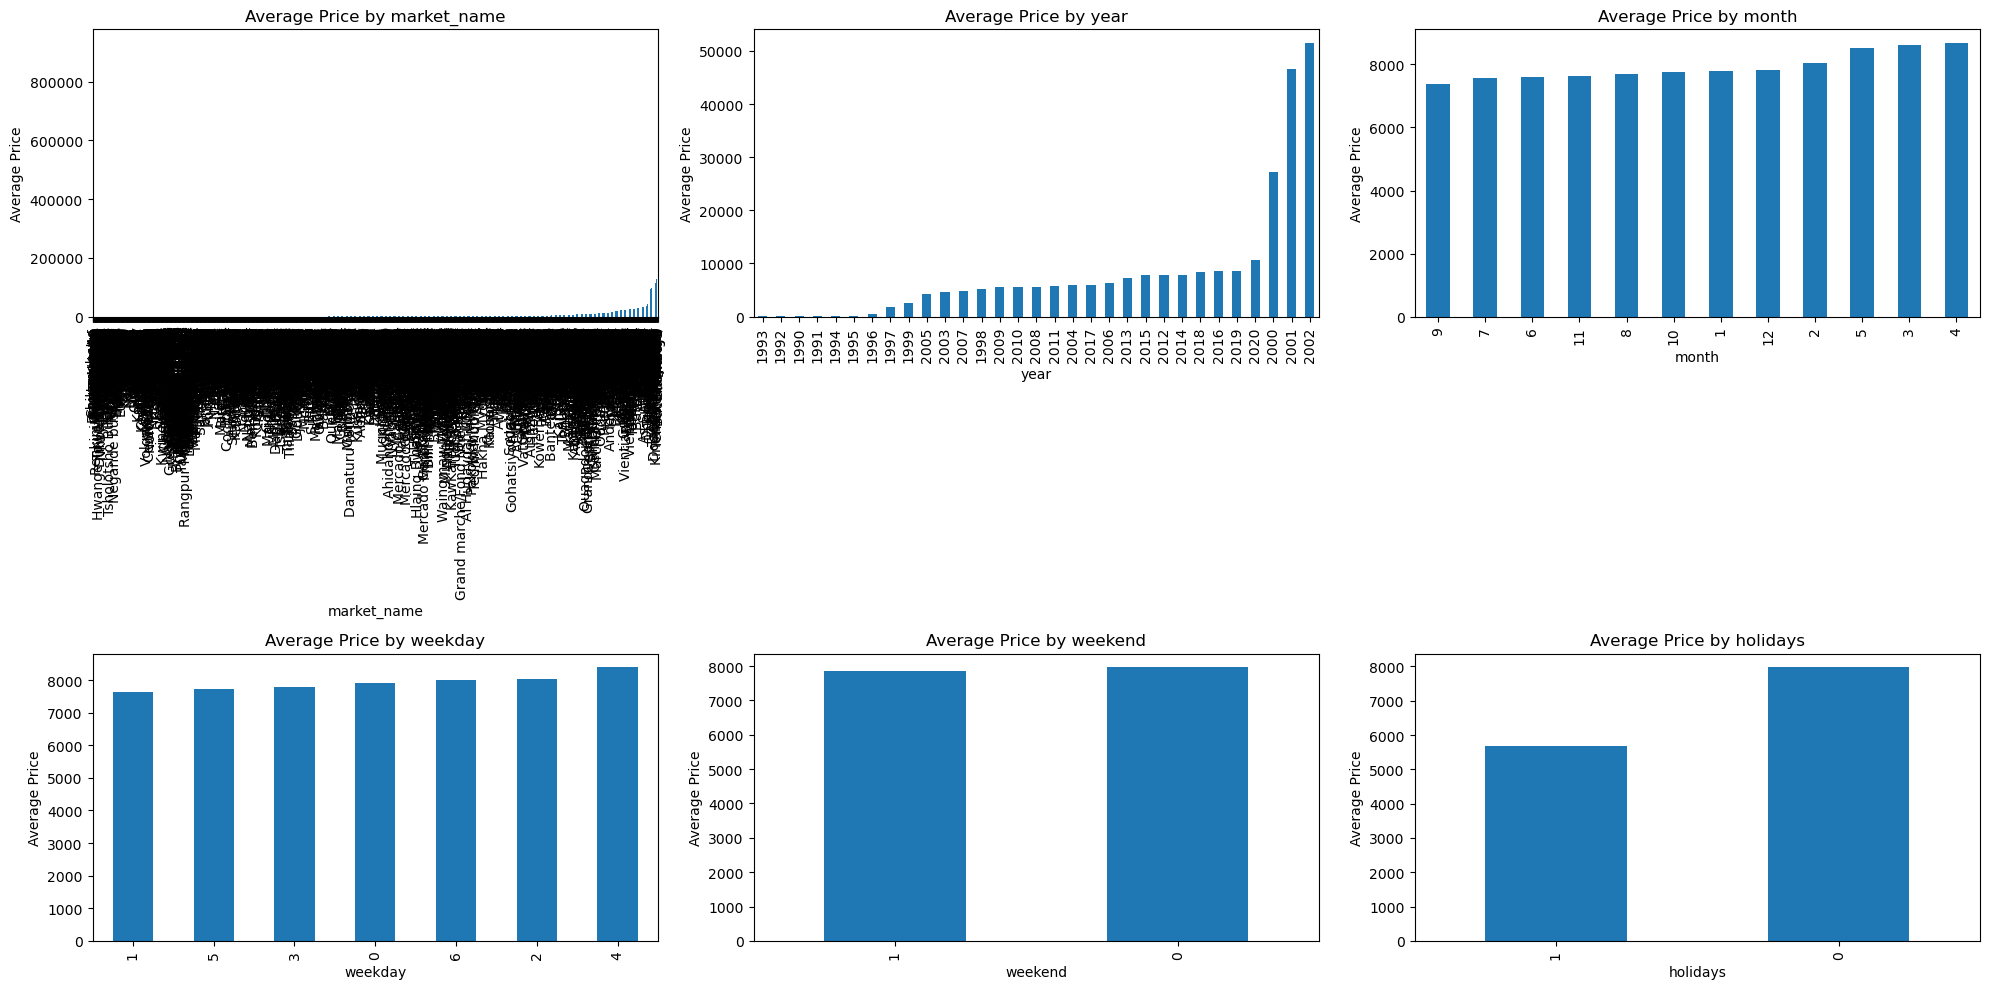

In [124]:
# Ensure 'weekend' column exists
df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Drop 'holidays' from features if it doesn't exist
features = [col for col in ['market_name', 'year', 'month', 'weekday', 'weekend', 'holidays'] if col in df.columns]

# Plot
plt.figure(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df.groupby(col)['price'].mean().sort_values().plot(kind='bar')
    plt.title(f"Average Price by {col}")
    plt.ylabel("Average Price")
    plt.tight_layout()

plt.show()


##### **Group by 'day' and calculate mean of 'price' only**

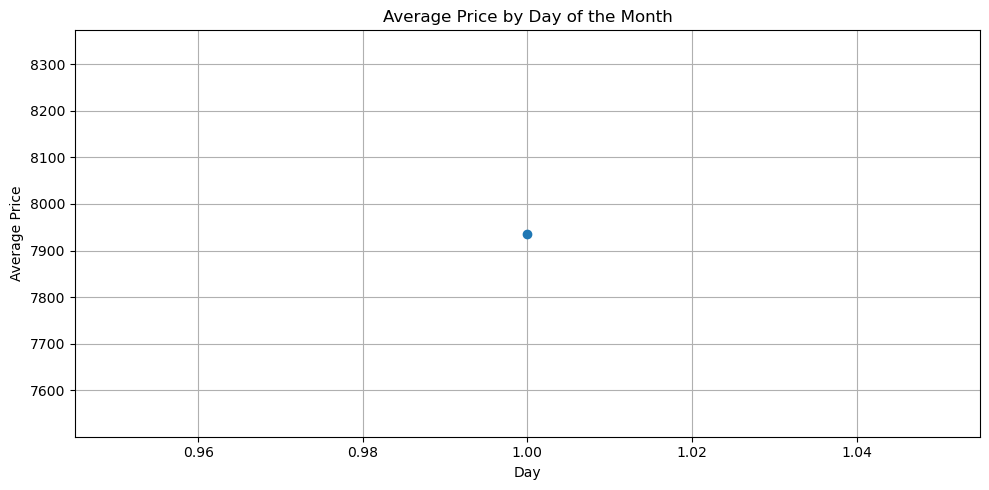

In [125]:
plt.figure(figsize=(10, 5))
df.groupby('day')['price'].mean().plot(marker='o')
plt.title("Average Price by Day of the Month")
plt.xlabel("Day")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()


##### **Calculating Simple Moving Average for a window period of 30 days**

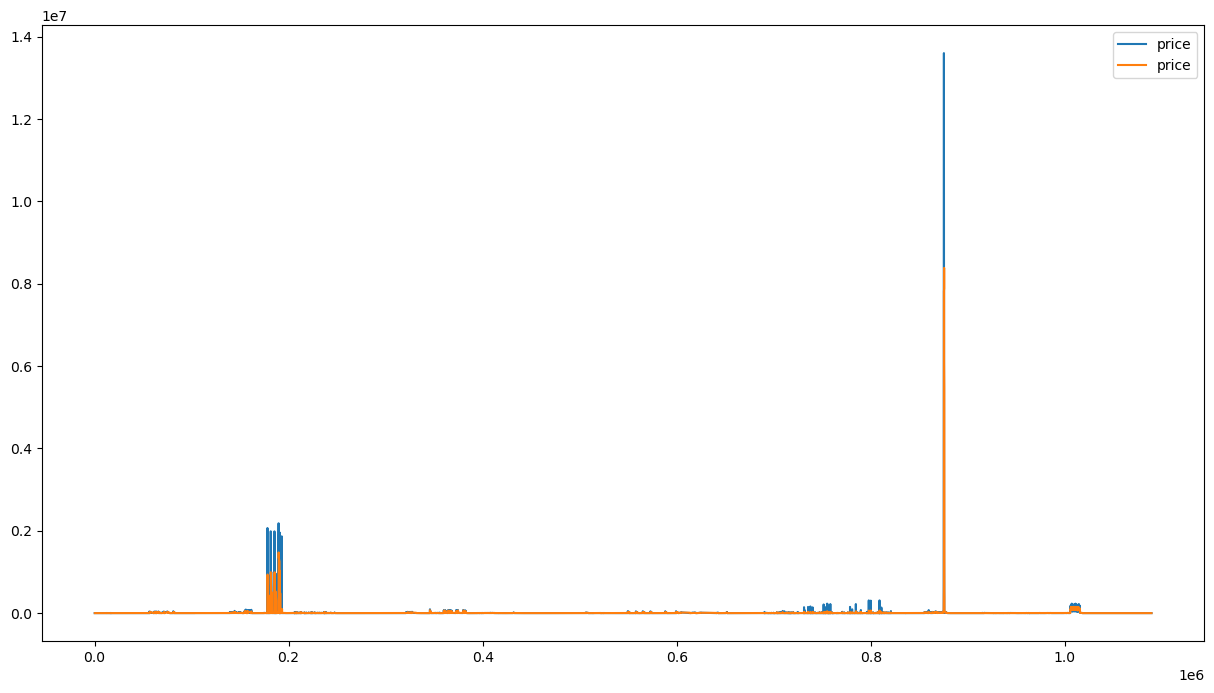

In [126]:
plt.figure(figsize=(15, 8))
window_size = 20
data = df[df['year']==2013]
windows = data['price'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]
data['price'].plot()
sma.plot()
plt.legend()
plt.show()

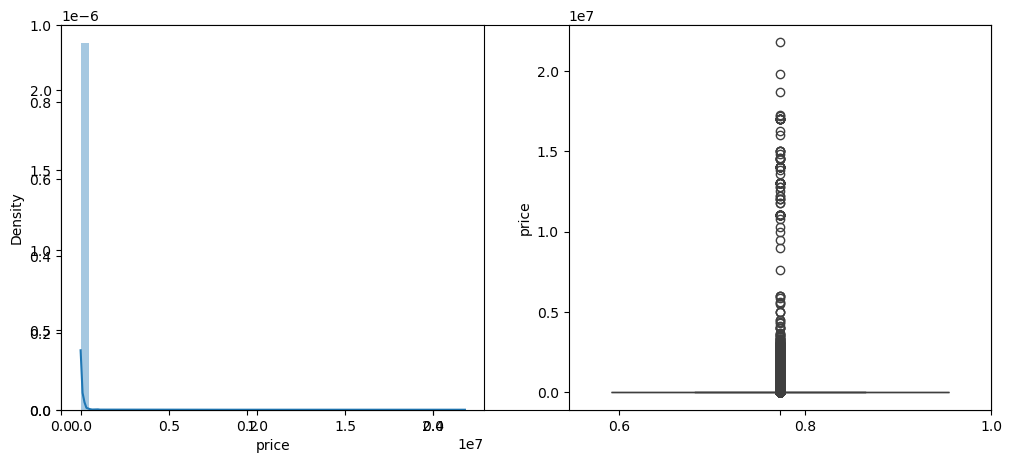

In [127]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['price'])
plt.subplot(1, 2, 2)
sns.boxplot(df['price'])
plt.show()

## **Represent the segmentation analysis graphically**

##### **Group by Categories & Compute Price Metrics**

In [ ]:
grouped = df.groupby(['country_name', 'commodity_name', 'market_name']).agg(
    avg_price=('price', 'mean'),
    max_price=('price', 'max'),
    min_price=('price', 'min')
).reset_index()


##### **Identify High/Low Price Markets**

In [ ]:
top_markets = grouped.sort_values(by='avg_price', ascending=False).head(10)
bottom_markets = grouped.sort_values(by='avg_price', ascending=True).head(10)

##### **Expensive Markets by Commodity**

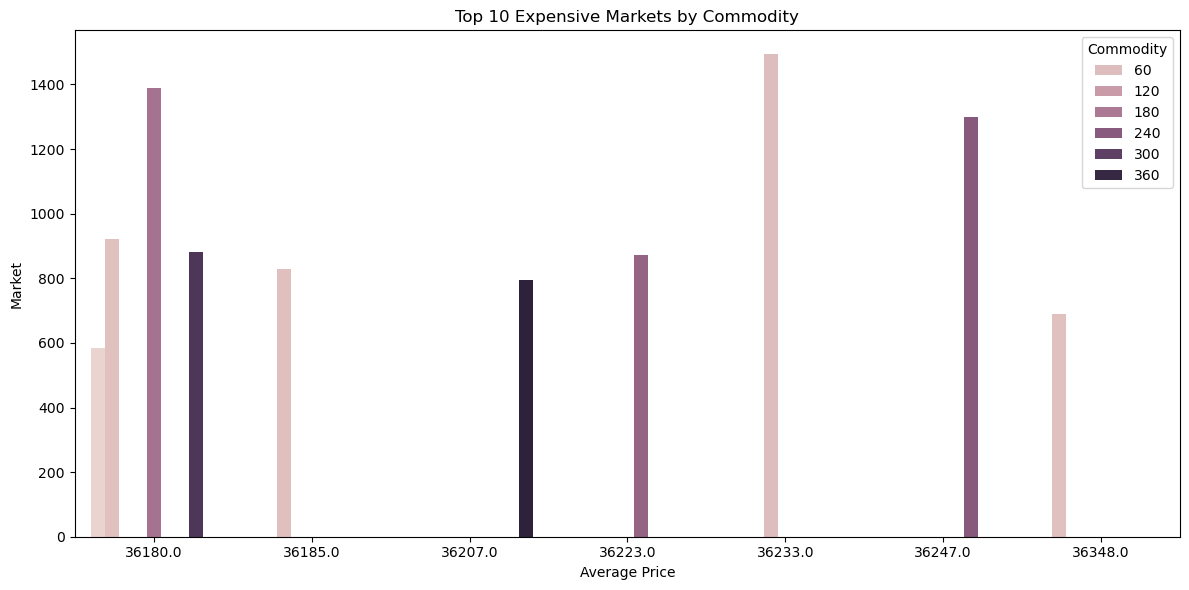

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_markets, x='avg_price', y='market_name', hue='commodity_name')
plt.title('Top 10 Expensive Markets by Commodity')
plt.xlabel('Average Price')
plt.ylabel('Market')
plt.legend(title='Commodity')
plt.tight_layout()
plt.show()


##### **Average Price by Country and Commodity (Heatmap)**

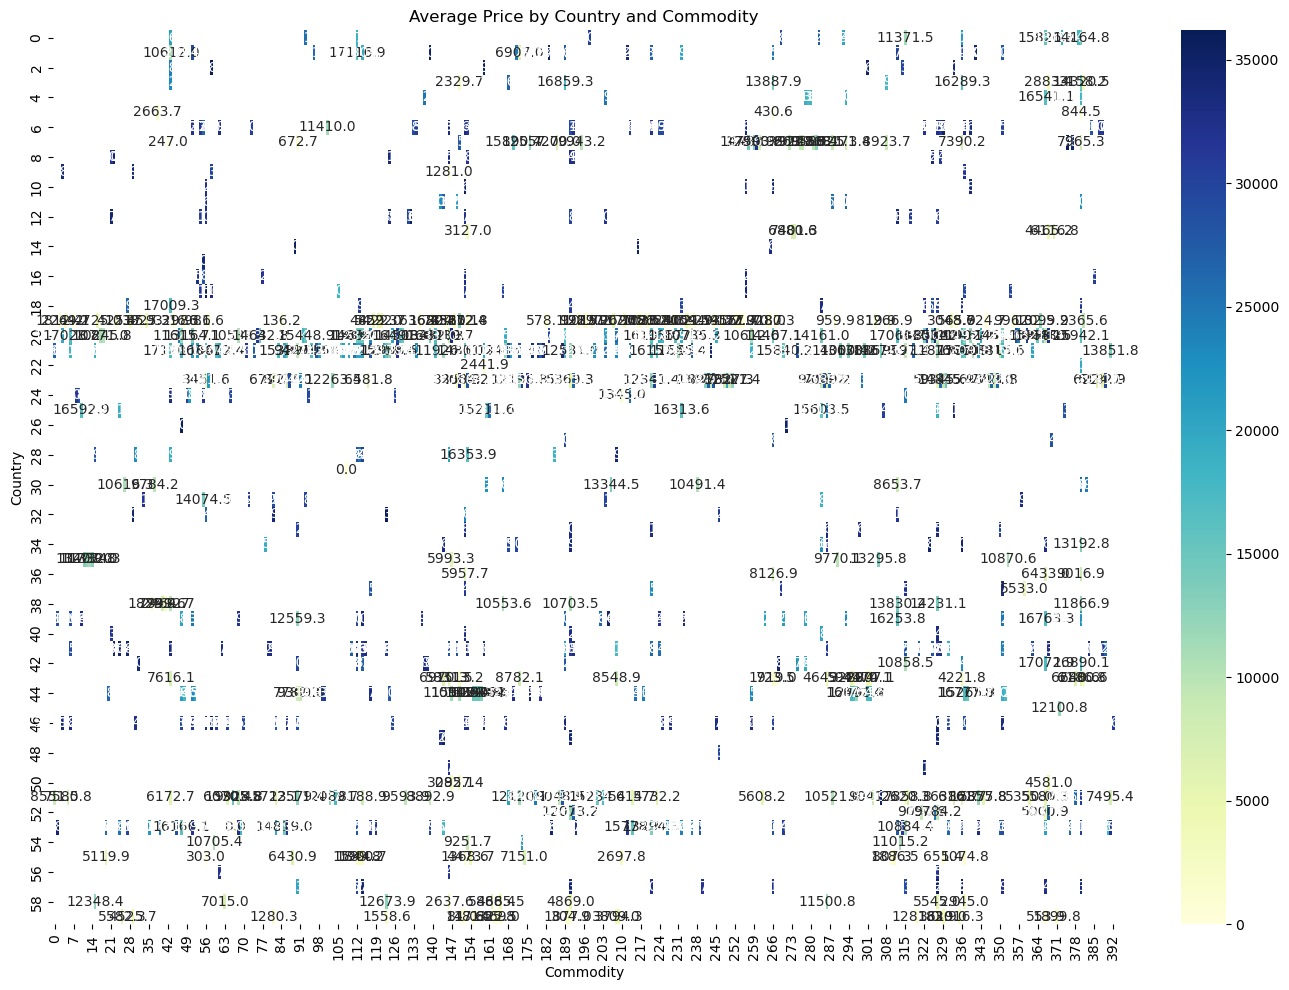

In [149]:
pivot = grouped.pivot_table(index='country_name', columns='commodity_name', values='avg_price')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Price by Country and Commodity')
plt.xlabel('Commodity')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


##### **Correlation Matrix**

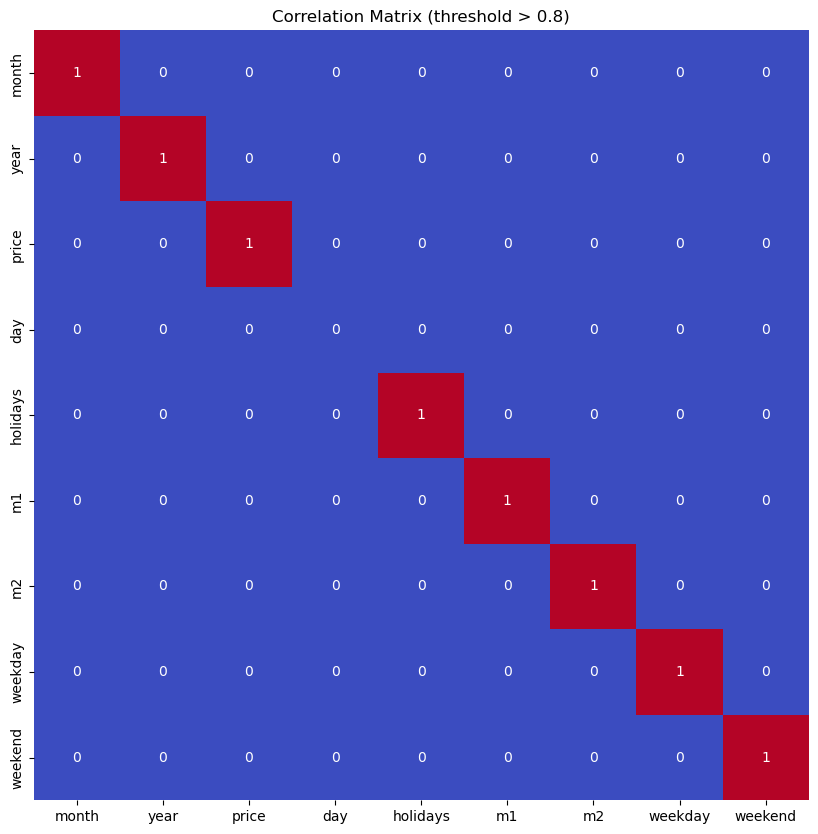

In [133]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr() > 0.8, annot=True, cbar=False, cmap='coolwarm')
plt.title("Correlation Matrix (threshold > 0.8)")
plt.show()

In [134]:
df = df[df['price']<140]

## **Feature Engineering:**

##### **Checking the outlier in price**

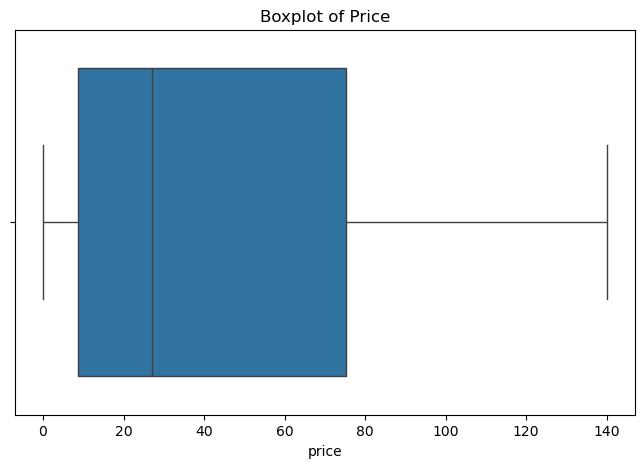

In [135]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

##### **Handling Outliers**

In [136]:
def handling_outliers(original_df, lst_of_columns):
    for col in lst_of_columns:
        q1 = original_df[col].quantile(0.25)
        q3 = original_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

# Use boolean indexing to set the outliers to the boundaries
        original_df[col] = original_df[col].mask(original_df[col] < lower_bound, lower_bound)
        original_df[col] = original_df[col].mask(original_df[col] > upper_bound, upper_bound)

    print("Handling is done")

def get_continuous_list(df):
    obj = df.select_dtypes(include='object')
    lst = list(df.columns)
    obj_lst = list(obj.columns)
    for col in obj_lst:
        lst.remove(col)
    return lst

print("All is Done")

All is Done


##### **Categorical Features Encoding**

In [137]:
le = LabelEncoder()
les = {}
for col in df.columns:
    les[col] = LabelEncoder()
    df[col]  = les[col].fit_transform(df[col])

## **Model Building**

##### **Selcting the features for modeling**

In [138]:
features = df.drop(['price', 'year'], axis=1)
target = df['price'].values

##### **Training and testing the  selected features**

In [139]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target,test_size = 0.05,random_state=22)

In [140]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


#### **Applying Regression algorithms**

In [141]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(verbosity=0),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, Y_train)

# Predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

# Metrics
    train_mae = mae(Y_train, train_preds)
    val_mae = mae(Y_val, val_preds)

    train_mse = mean_squared_error(Y_train, train_preds)
    val_mse = mean_squared_error(Y_val, val_preds)

    train_r2 = r2_score(Y_train, train_preds)
    val_r2 = r2_score(Y_val, val_preds)

# Print results
    print(f"Model: {name}")
    print("Training performance:")
    print(f"  MAE: {train_mae:.4f}")
    print(f"  MSE: {train_mse:.4f}")
    print(f"  R²:  {train_r2:.4f}")
    print("Validation performance:")
    print(f"  MAE: {val_mae:.4f}")
    print(f"  MSE: {val_mse:.4f}")
    print(f"  R²:  {val_r2:.4f}")
    print("=" * 50)

Model: Linear Regression
Training performance:
  MAE: 7525.3770
  MSE: 83843056.6252
  R²:  0.1283
Validation performance:
  MAE: 7570.5733
  MSE: 84752616.8064
  R²:  0.1253
Model: XGBoost
Training performance:
  MAE: 1393.2228
  MSE: 4096645.6045
  R²:  0.9574
Validation performance:
  MAE: 1425.7399
  MSE: 4244780.4604
  R²:  0.9562
Model: Lasso Regression
Training performance:
  MAE: 7525.7873
  MSE: 83843099.0359
  R²:  0.1283
Validation performance:
  MAE: 7570.9757
  MSE: 84751107.0727
  R²:  0.1253
Model: Ridge Regression
Training performance:
  MAE: 7525.3831
  MSE: 83843056.6287
  R²:  0.1283
Validation performance:
  MAE: 7570.5795
  MSE: 84752609.4615
  R²:  0.1253


## **Tune Hyperparameters**

##### **Defining  Parameter Grids**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Parameter grids for tuning
param_grids = {
    "Linear Regression": {}, 

    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1],
    },

    "Lasso Regression": {
        'alpha': [0.001, 0.01, 0.1, 1, 10]
    },

    "Ridge Regression": {
        'alpha': [0.01, 0.1, 1, 10, 100]
    }
}


##### **Tuning Each Model**

In [153]:
best_models = {}

for name, model in models.items():
    print(f"Tuning {name}...")

    param_grid = param_grids.get(name, {})

    if not param_grid:
        print(f"No parameters to tune for {name}. Skipping GridSearch.")
        best_models[name] = model.fit(X_train, Y_train)
        continue

    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid.fit(X_train, Y_train)

    best_models[name] = grid.best_estimator_

    print(f"Best parameters for {name}: {grid.best_params_}")
    print("=" * 50)


Tuning Linear Regression...
No parameters to tune for Linear Regression. Skipping GridSearch.
Tuning XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
Tuning Lasso Regression...
Best parameters for Lasso Regression: {'alpha': 0.001}
Tuning Ridge Regression...
Best parameters for Ridge Regression: {'alpha': 0.01}
